## Problem statement 
The Dataset contains information on policyholders having the attributes like policy tenure, age of the car, age of the car owner, the 
population density of the city, make and model of the car, power, engine type, etc. You need to develop a machine learning model for 
identifying the potential policyholders. Potential policyholders are those who may opt for insurance services in future. 

## Solution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings 
warnings.filterwarnings(action='ignore')

### Loading Dataset

In [3]:
df = pd.read_csv('clean_dataset.csv')

### EDA

In [4]:
df.columns

Index(['Unnamed: 0', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'is_claim', 'max_torque',
       'max_power', 'airbags', 'displacement', 'cylinder', 'gear_box',
       'turning_radius', 'Length', 'width', 'height', 'Gross_weight',
       'ncap_rating', 'is_esc_No', 'is_esc_Yes', 'is_adjustable_steering_No',
       'is_adjustable_steering_Yes', 'is_tpms_No', 'is_tpms_Yes',
       'is_parking_sensors_No', 'is_parking_sensors_Yes',
       'is_parking_camera_No', 'is_parking_camera_Yes',
       'is_front_fog_lights_No', 'is_front_fog_lights_Yes',
       'is_rear_window_wiper_No', 'is_rear_window_wiper_Yes',
       'is_rear_window_washer_No', 'is_rear_window_washer_Yes',
       'is_rear_window_defogger_No', 'is_rear_window_defogger_Yes',
       'is_brake_assist_No', 'is_brake_assist_Yes', 'is_power_door_locks_No',
       'is_power_door_locks_Yes', 'is_central_locking_No',
       'is_central_locking_Yes', 'is_power_steering_No',

In [5]:
df = df.drop(['Unnamed: 0', 'turning_radius'], axis=1)

In [6]:
df.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,is_claim,max_torque,max_power,airbags,...,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC
0,0.515874,0.05,0.644231,0,4990,1,0,0.017143,0.006727,2,...,0,0,0,0,0,1,0,0,0,0
1,0.672619,0.02,0.375000,11,27003,1,0,0.017143,0.006727,2,...,0,0,0,0,0,1,0,0,0,0
2,0.841110,0.02,0.384615,15,4076,1,0,0.017143,0.006727,2,...,0,0,0,0,0,1,0,0,0,0
3,0.900277,0.11,0.432692,16,21622,1,0,0.025682,0.014750,2,...,0,1,0,0,0,0,0,0,0,0
4,0.596403,0.11,0.634615,17,34738,2,0,0.021412,0.012193,2,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.describe()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,is_claim,max_torque,max_power,airbags,...,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC
count,30100.000000,30100.000000,30100.000000,30100.000000,30100.000000,30100.000000,30100.000000,30100.000000,30100.000000,30100.000000,...,30100.000000,30100.000000,30100.000000,30100.000000,30100.000000,30100.000000,30100.000000,30100.000000,30100.000000,30100.000000
mean,0.612097,0.069436,0.469028,13.052957,18882.117342,1.758272,0.064086,0.043051,0.016102,3.122757,...,0.050731,0.018306,0.235116,0.027973,0.006346,0.255847,0.020631,0.236944,0.071163,0.036047
std,0.414670,0.056833,0.122673,6.819564,17737.026405,1.136681,0.244911,0.032406,0.008220,1.825846,...,0.219451,0.134057,0.424079,0.164899,0.079407,0.436344,0.142149,0.425214,0.257101,0.186409
min,0.002739,0.000000,0.288462,0.000000,290.000000,1.000000,0.000000,0.017143,0.006727,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.207099,0.020000,0.365385,6.000000,6112.000000,1.000000,0.000000,0.017143,0.006727,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.575252,0.060000,0.451923,15.000000,8794.000000,1.000000,0.000000,0.025682,0.014750,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040013,0.110000,0.548077,20.000000,27003.000000,3.000000,0.000000,0.090909,0.027192,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.376478,1.000000,0.971154,21.000000,73430.000000,5.000000,1.000000,0.114286,0.028362,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30100 entries, 0 to 30099
Data columns (total 90 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   policy_tenure                          30100 non-null  float64
 1   age_of_car                             30100 non-null  float64
 2   age_of_policyholder                    30100 non-null  float64
 3   area_cluster                           30100 non-null  int64  
 4   population_density                     30100 non-null  int64  
 5   make                                   30100 non-null  int64  
 6   is_claim                               30100 non-null  int64  
 7   max_torque                             30100 non-null  float64
 8   max_power                              30100 non-null  float64
 9   airbags                                30100 non-null  int64  
 10  displacement                           30100 non-null  int64  
 11  cy

In [9]:
df.corr().style.background_gradient()

### Preprocesing

In [10]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
sc = StandardScaler()
lb = LabelEncoder()
df['population_density'] = sc.fit_transform(df[['population_density']])
df['displacement'] = sc.fit_transform(df[['displacement']])

In [11]:
missing_count = df.isna().sum()

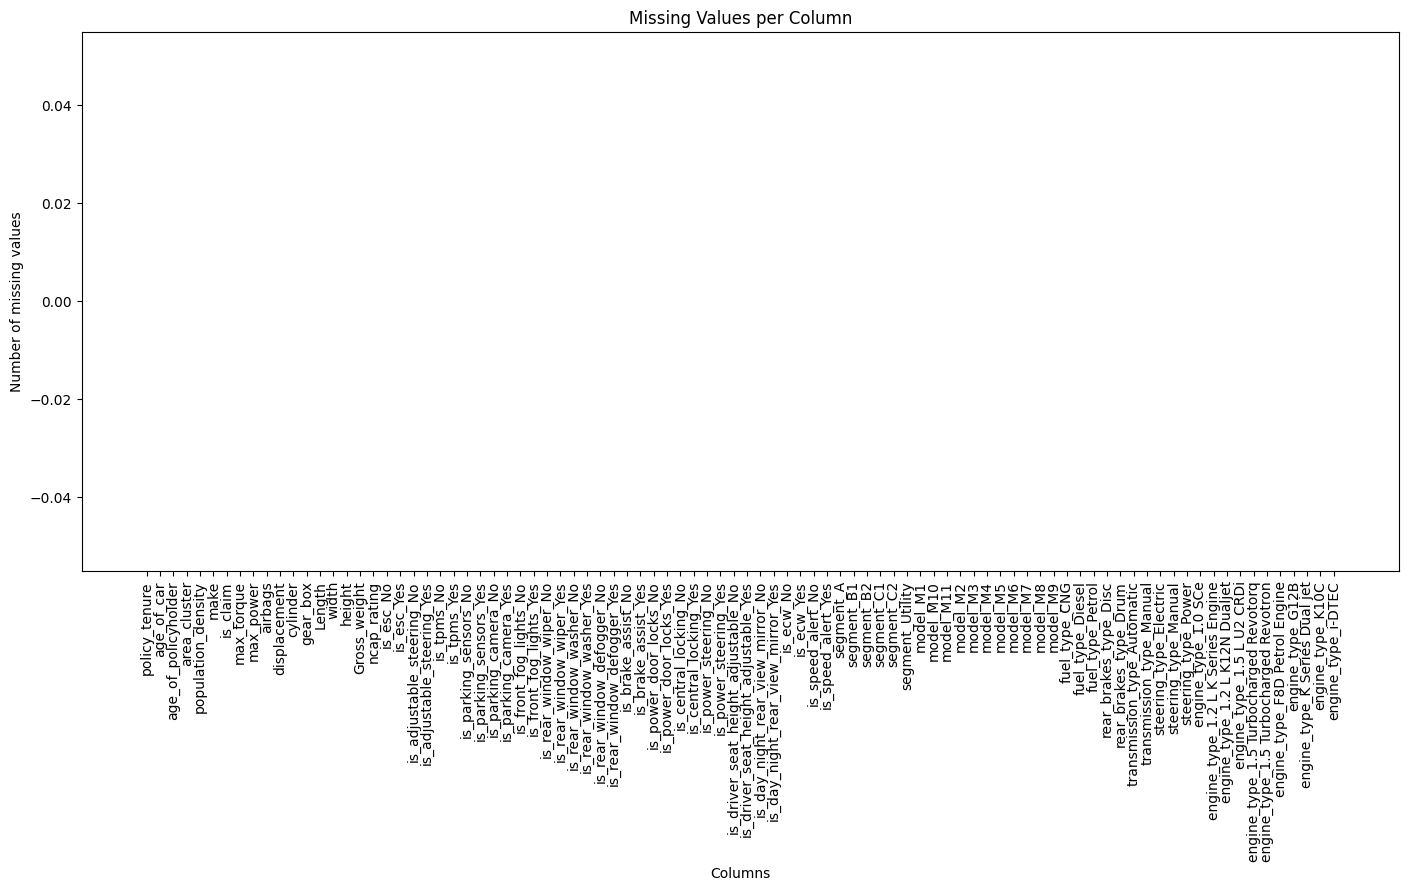

In [12]:
plt.figure(figsize=(17,7))
plt.bar(missing_count.index, missing_count.values)
plt.xlabel("Columns")
plt.ylabel("Number of missing values")
plt.title("Missing Values per Column")
plt.xticks(rotation=90)
plt.show()
## No null values prresent

<Axes: >

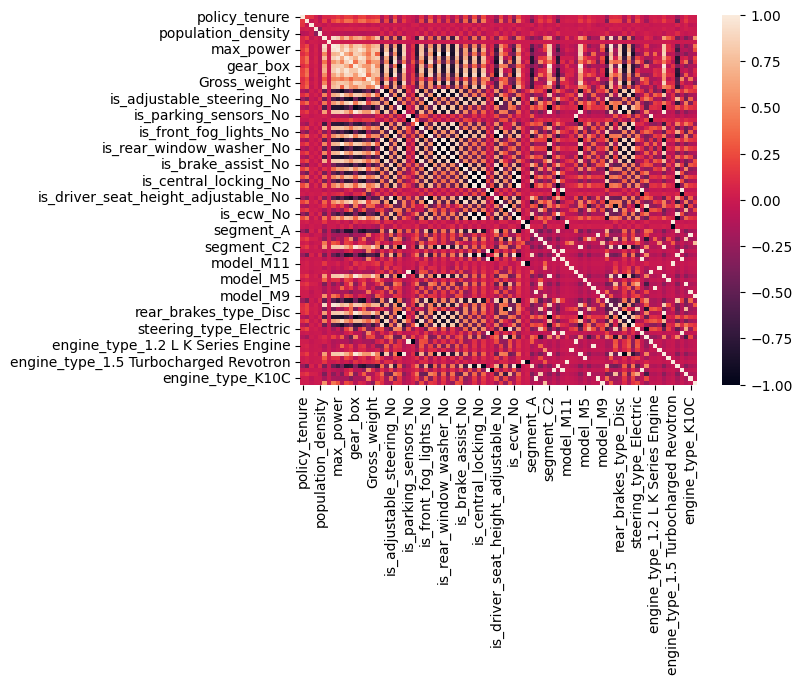

In [13]:
sns.heatmap(df.corr())

### Data Splitting and Resampling

In [14]:
x = df.drop('is_claim', axis=1)
y = df['is_claim']

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=123456)

In [16]:
from imblearn.over_sampling import SMOTE
# resample only training

sm = SMOTE(random_state=123456)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

# from imblearn.combine import SMOTETomek
# smt = SMOTETomek(random_state=123456)
# x_train_res, y_train_res = smt.fit_resample(x_train, y_train)


In [17]:
x_train_res

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,max_torque,max_power,airbags,displacement,...,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC
0,1.172889,0.070000,0.375000,20,-0.568770,3,0.090909,0.028362,6,1.249173,...,0,0,1,0,0,0,0,0,0,0
1,0.085825,0.000000,0.423077,2,-0.720207,1,0.017143,0.006727,2,-1.373138,...,0,0,0,0,0,1,0,0,0,0
2,1.135703,0.040000,0.451923,20,-0.568770,1,0.025682,0.014750,2,0.135537,...,0,0,0,0,0,0,0,1,0,0
3,0.364026,0.050000,0.557692,5,-0.625488,1,0.028333,0.010280,1,0.131775,...,0,0,0,0,0,0,1,0,0,0
4,0.123943,0.000000,0.442308,20,-0.568770,1,0.025682,0.014750,2,0.135537,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45113,1.185092,0.157540,0.510241,11,0.457857,1,0.028333,0.010280,1,0.131775,...,0,0,0,0,0,0,1,0,0,0
45114,0.370440,0.036362,0.451343,11,0.457857,3,0.090909,0.028362,6,1.249173,...,0,0,1,0,0,0,0,0,0,0
45115,0.085277,0.000000,0.698972,15,-0.834771,1,0.017143,0.006727,2,-1.373138,...,0,0,0,0,0,1,0,0,0,0
45116,1.121472,0.095903,0.550124,20,-0.568770,3,0.090909,0.028362,6,1.249173,...,0,0,1,0,0,0,0,0,0,0


In [18]:
y_train_res.value_counts()

is_claim
0    22559
1    22559
Name: count, dtype: int64

In [19]:
y_train.value_counts()

is_claim
0    22559
1     1521
Name: count, dtype: int64

In [20]:
y_train.size

24080

In [21]:
y_train_res.size

45118

### Model Training

#### Logistic Regression Model

In [22]:
from sklearn.linear_model import LogisticRegressionCV
def log_reg_model():
    model = LogisticRegressionCV()
    model.fit(x_train_res, y_train_res)
    return model

#### KNN Model

In [23]:
from sklearn.neighbors import KNeighborsClassifier
def knn_model():
    model = KNeighborsClassifier()
    model.fit(x_train_res, y_train_res)
    return model

#### SVM Model

In [24]:
from sklearn.svm import SVC
def svm_model():
    model = SVC()
    model.fit(x_train, y_train)
    return model

#### Decision Tree Model

In [25]:
from sklearn.tree import DecisionTreeClassifier
def dec_tree_model():
    model = DecisionTreeClassifier(criterion="entropy",max_depth=35)
    model.fit(x_train_res, y_train_res)
    return model

### Perfromance Score

In [26]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

def evaluate_model(model):
    # training accuracy
    y_pred = model.predict(x_train)
    y_true = y_train

    # calculate training accuracy
    training_accuracy = accuracy_score(y_true,y_pred)

    # testing accuracy
    y_pred = model.predict(x_test)
    y_true = y_test

    # get the performance metrics for testing
    testing_accuracy = accuracy_score(y_true,y_pred)
    testing_precision = precision_score(y_true,y_pred, average="macro")
    testing_recall = recall_score(y_true,y_pred, average="macro")
    testing_f1 = f1_score(y_true,y_pred, average="macro")
    testing_roc_auc = roc_auc_score(y_true,y_pred, average="macro")

    return training_accuracy,testing_accuracy,testing_precision,testing_recall,testing_f1, testing_roc_auc

In [27]:
## Genereate performance chart
models = [
    # ("Logistic Regression",log_reg_model(),(0,0)),
    # ("KNN",knn_model(),(0,0)),
    # ("SVM",svm_model(),(1,0)),
    ("Decision Tree",dec_tree_model(),(0,1))
]

In [28]:
performance_data = []
for model_name, model, position in models:
    train_accuracy, test_accuracy, test_precision, test_recall, test_f1, test_roc_auc = evaluate_model(model)
    performance_data.append([
        model_name, f"{train_accuracy*100:.2f}",  f"{test_accuracy*100:.2f}", f"{test_precision*100:.2f}", f"{test_recall*100:.2f}", f"{test_f1*100:.2f}", f"{test_roc_auc*100:.2f}"
    ])

In [29]:
performance_chart = pd.DataFrame(
    performance_data, 
    columns=["MOdel", "Training Accuracy", "Testing Accuracy", "Precision", "Recall", "F1", "ROC-AUC"]
)

### Performance Chart

In [30]:
performance_chart

,MOdel,Training Accuracy,Testing Accuracy,Precision,Recall,F1,ROC-AUC
0,Decision Tree,97.55,85.90,51.84,52.43,52.00,52.43


### Data Visualization

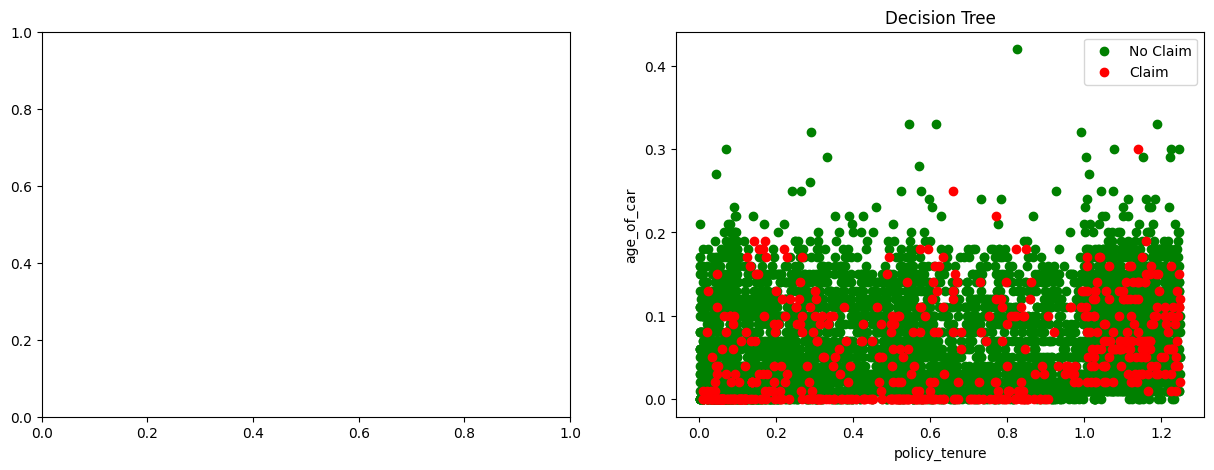

In [44]:
fig, axis = plt.subplots(1, 2, figsize=(15, 5))

for model_name, model, position in models:
    y_pred = model.predict(x_test)

    ax = axis[position[1]] 
    ax.scatter( x_test['policy_tenure'][y_pred == 0], x_test['age_of_car'][y_pred == 0], label="No Claim", color='green' )
    ax.scatter( x_test['policy_tenure'][y_pred == 1], x_test['age_of_car'][y_pred == 1], label="Claim", color='red' )
    ax.set( xlabel='policy_tenure', ylabel='age_of_car', title=model_name )
    ax.legend()


### Export Model

In [32]:
# import pickle

# dt_model = None
# for model_name, model, position in models:
#     if model_name == "Decision Tree":
#         dt_model = model
#         break

# with open("decision_tree_model_1.pkl", "wb") as file:
#     pickle.dump(dt_model, file)

# print("Decision Tree model saved successfully!")


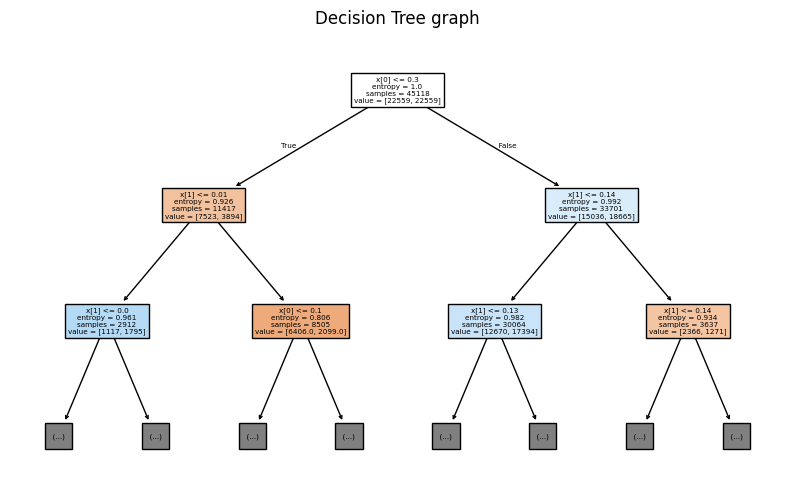

In [41]:
from sklearn.tree import plot_tree

# dec_tree = plot_tree(model, max_depth=1, filled=True, label="Decision Tree graph")
plt.figure(figsize=(10,6))
plot_tree(model, max_depth=2, filled=True, label='all')
plt.title("Decision Tree graph")
plt.show()